## CatsDogsPanda_Image Classifier Using KNN

**Objective:**
   * Perform Image classification using K-NN.
   * The objective is to demonstrate that we can classify the images without algo. like CNN.
   
**Background info:**
   * Note that the input image is a bunch of numbers based on their intensity among R, G and B channels.
   * The K-NN algo will classify the image based on nearest neighbour to the intensity value.
   
**Pros:**
   * Simple algo. will classify based on the distance (Euclidean distance).

**Cons:**
  * Don't scale.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib
import glob
import random
import os
from sklearn.preprocessing import LabelEncoder  # preprocess
from sklearn.model_selection import train_test_split # for data split
from sklearn.neighbors import KNeighborsClassifier   # classifer
from sklearn.metrics import confusion_matrix, classification_report #metric


In [3]:
print('numpy: ', np.__version__)
print('opencv: ', cv2.__version__)

numpy:  1.14.2
opencv:  3.4.4


## Look at Images

In [4]:
ImageDir = '../datasets/animals'

# recursively go over the datset folder and get the file names.
ImageList = list(pathlib.Path(ImageDir).rglob('*.jpg'))
print(len(ImageList))

3000


In [6]:
ImageList[1:4]

[PosixPath('../datasets/animals/cats/cats_00002.jpg'),
 PosixPath('../datasets/animals/cats/cats_00003.jpg'),
 PosixPath('../datasets/animals/cats/cats_00004.jpg')]

In [9]:
# get the filename.
ImageList[0].as_posix()

'../datasets/animals/cats/cats_00001.jpg'

../datasets/animals/dogs/dogs_00404.jpg
shape: (222, 213, 3)


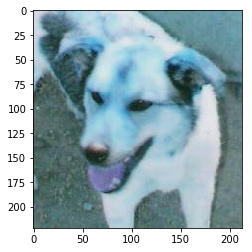

../datasets/animals/dogs/dogs_00448.jpg
shape: (408, 408, 3)


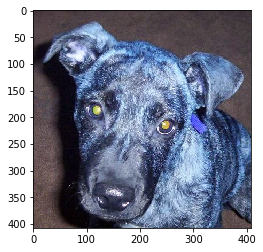

../datasets/animals/panda/panda_00034.jpg
shape: (224, 300, 3)


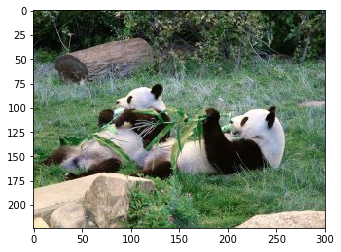

../datasets/animals/cats/cats_00796.jpg
shape: (368, 328, 3)


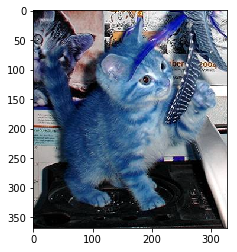

../datasets/animals/dogs/dogs_01000.jpg
shape: (352, 333, 3)


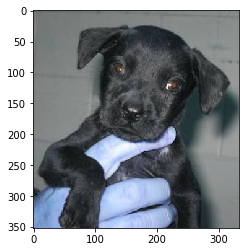

../datasets/animals/cats/cats_00393.jpg
shape: (374, 500, 3)


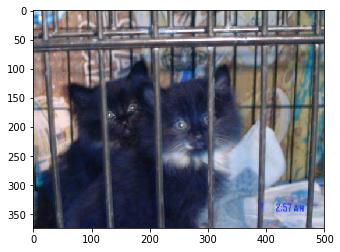

In [10]:
# look at few images
for i in range(6):
    idx = random.randint(1,len(ImageList))
    print(ImageList[idx])
    img = cv2.imread(ImageList[idx].as_posix())
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

## Load all the images

In [11]:
## load all the images
## resize them to one size
def preprocess_image(img, width, height, interpolation=cv2.INTER_AREA):
    return( cv2.resize(img, (width, height), interpolation))


In [12]:
# load all images.
def load_all_images(imageList, verbose=-1):
    data = []
    labels = []

    for (i, imagepath) in enumerate(imageList):
        filename = imagepath.as_posix()
        img = cv2.imread(filename)
        label = filename.split(os.path.sep)[-2]
        img = preprocess_image(img, 32, 32)

        data.append(img)
        labels.append(label)

        if ( verbose > 0 and i > 0 and (i+1) % verbose == 0):
            print('Info: Processed {} / {}'.format(i+1, len(imageList)))


    return(np.array(data), np.array(labels))

In [13]:
##
print('Load All Images...')
(data, labels) = load_all_images(ImageList, verbose=250)

Load All Images...
Info: Processed 250 / 3000
Info: Processed 500 / 3000
Info: Processed 750 / 3000
Info: Processed 1000 / 3000
Info: Processed 1250 / 3000
Info: Processed 1500 / 3000
Info: Processed 1750 / 3000
Info: Processed 2000 / 3000
Info: Processed 2250 / 3000
Info: Processed 2500 / 3000
Info: Processed 2750 / 3000
Info: Processed 3000 / 3000


In [15]:
print(data.shape)

(3000, 3072)


In [16]:
# note that we need to reshape the data
# for fit(), we need to provide n_samples and n_features
# n_features is 32 x 32 x 3 = 3072 (size of image with channels)
data = data.reshape((data.shape[0], 32*32*3))

print(data.shape)

(3000, 3072)


In [27]:
# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)
print(np.unique(np.array(labels)))

print(le.classes_)
#print(le.inverse_transform(le.classes_))
le.classes_   # how to get the string labels ['cats', 'dogs', 'panda']

[0 1 2]
[0 1 2]


array([0, 1, 2])

## Build the Model

In [30]:
# split the data
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=123)

# try K-NN algorithm

# Build the model
print("Info: Build model using K-NN classifier..")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainX, trainY)

Info: Build model using K-NN classifier..


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
# evaulate the model
print('Info: Evaluate the model')
pred = model.predict(testX)

Info: Evaluate the model


In [34]:
?classification_report

In [36]:
#for some reason, labels are not showing up
print(classification_report(testY, pred, labels=le.classes_))

              precision    recall  f1-score   support

           0       0.38      0.57      0.45       252
           1       0.36      0.46      0.41       240
           2       0.86      0.21      0.34       258

   micro avg       0.41      0.41      0.41       750
   macro avg       0.53      0.41      0.40       750
weighted avg       0.54      0.41      0.40       750



In [33]:
confusion_mat = confusion_matrix(testY, pred)
print(confusion_mat)

[[143 104   5]
 [125 111   4]
 [110  93  55]]


In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, pred))


0.412


## Interpretting the Confusion matrix

### Compute the accuracy

In [37]:
# get the diagonal elemetns
confusion_mat.diagonal()

array([143, 111,  55])

In [38]:
# get the sum
sum(confusion_mat.diagonal())

309

In [39]:
le.classes_

array([0, 1, 2])

In [40]:
len(testY)

750

In [42]:
#cats
print(np.count_nonzero(testY == 0))

252


In [43]:
#dogs
np.count_nonzero(testY == 1)

240

In [44]:
# panda
np.count_nonzero(testY == 2)

258

In [45]:
# calculate the accuracy accuracy_score
sum(confusion_mat.diagonal()) / len(testY)

0.412

### Understanding Precision 

  * Precision conveys, **How often the class prediction is correct?**

In [54]:
# get the fist column - those many are predicted as Cats
confusion_mat[:,0]

array([143, 125, 110])

In [53]:
# precision for cats
print(confusion_mat[0,0] / sum(confusion_mat[:,0]) )

0.3783068783068783


In [57]:
# precision for dogs
print(confusion_mat[1,1])
print(confusion_mat[:,1])
print(confusion_mat[1,1] / sum(confusion_mat[:,1]))

111
[104 111  93]
0.36038961038961037


In [58]:
# precision for dogs
print(confusion_mat[2,2])
print(confusion_mat[:,2])
print(confusion_mat[2,2] / sum(confusion_mat[:,2]))

55
[ 5  4 55]
0.859375


### Understanding Recall (Sensitivity)

In [60]:
# get the first row 
confusion_mat[0,:]

array([143, 104,   5])

In [61]:
# recall for cats
print(confusion_mat[0,0]/ sum(confusion_mat[0,:]))

0.5674603174603174


In [62]:
# dogs
print(confusion_mat[1,1])
print(confusion_mat[1,1]/ sum(confusion_mat[1,:]))

111
0.4625


In [65]:
# panda
print(confusion_mat[2,2])
print(confusion_mat[2,:])
print(sum(confusion_mat[2,:]))
print(confusion_mat[2,2]/ sum(confusion_mat[2,:]))

55
[110  93  55]
258
0.2131782945736434
